In [1]:
import torch
import torch.nn as nn

import torch.optim as optim

from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

from itertools import chain
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

from tqdm import tqdm

/Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/usr/local/lib/libpng16.16.dylib' (no such file), '/usr/lib/libpng16.16.dylib' (no such file)
  warn(f"Failed to load image Python extension: {e}")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           2,336
              ReLU-4           [-1, 32, 28, 28]               0
            Linear-5                   [-1, 64]       1,605,696
            Linear-6                   [-1, 64]       1,605,696
Total params: 3,213,808
Trainable params: 3,213,808
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.48
Params size (MB): 12.26
Estimated Total Size (MB): 12.74
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               

  1%|          | 2/235 [00:00<00:43,  5.38it/s]

Потери восстановления: 0.9171317219734192
Потери расхождения распределений: 22.811481475830078


 43%|████▎     | 102/235 [00:18<00:23,  5.67it/s]

Потери восстановления: 0.1454072743654251
Потери расхождения распределений: 6.2863054275512695


 86%|████████▌ | 202/235 [00:35<00:05,  5.67it/s]

Потери восстановления: 0.09841398149728775
Потери расхождения распределений: 7.791036128997803


100%|██████████| 235/235 [00:41<00:00,  5.65it/s]


Эпоха 1 / 10. Потери на последнем пакете: 0.1068258062005043


  0%|          | 1/235 [00:00<00:41,  5.58it/s]

Потери восстановления: 0.09433513134717941
Потери расхождения распределений: 6.892817497253418


 43%|████▎     | 102/235 [00:19<00:26,  4.93it/s]

Потери восстановления: 0.08578122407197952
Потери расхождения распределений: 7.04150390625


 86%|████████▌ | 202/235 [00:38<00:05,  5.53it/s]

Потери восстановления: 0.0816124677658081
Потери расхождения распределений: 7.101597785949707


100%|██████████| 235/235 [00:44<00:00,  5.32it/s]


Эпоха 2 / 10. Потери на последнем пакете: 0.08439695835113525


  0%|          | 1/235 [00:00<00:45,  5.15it/s]

Потери восстановления: 0.07883621752262115
Потери расхождения распределений: 7.320583343505859


 43%|████▎     | 102/235 [00:17<00:23,  5.73it/s]

Потери восстановления: 0.07377433031797409
Потери расхождения распределений: 8.381789207458496


 86%|████████▌ | 202/235 [00:35<00:05,  5.82it/s]

Потери восстановления: 0.06923177093267441
Потери расхождения распределений: 8.253057479858398


100%|██████████| 235/235 [00:40<00:00,  5.78it/s]


Эпоха 3 / 10. Потери на последнем пакете: 0.07432703673839569


  0%|          | 1/235 [00:00<00:40,  5.73it/s]

Потери восстановления: 0.06825390458106995
Потери расхождения распределений: 7.4036173820495605


 43%|████▎     | 102/235 [00:18<00:23,  5.74it/s]

Потери восстановления: 0.06322155892848969
Потери расхождения распределений: 8.224088668823242


 86%|████████▌ | 202/235 [00:35<00:05,  5.64it/s]

Потери восстановления: 0.06215321645140648
Потери расхождения распределений: 8.22807788848877


100%|██████████| 235/235 [00:41<00:00,  5.67it/s]


Эпоха 4 / 10. Потери на последнем пакете: 0.07090833783149719


  0%|          | 1/235 [00:00<00:41,  5.59it/s]

Потери восстановления: 0.06149892508983612
Потери расхождения распределений: 8.779607772827148


 43%|████▎     | 102/235 [00:18<00:23,  5.74it/s]

Потери восстановления: 0.06013310328125954
Потери расхождения распределений: 8.78094482421875


 86%|████████▌ | 202/235 [00:35<00:05,  5.73it/s]

Потери восстановления: 0.057122331112623215
Потери расхождения распределений: 8.949594497680664


100%|██████████| 235/235 [00:41<00:00,  5.64it/s]


Эпоха 5 / 10. Потери на последнем пакете: 0.0626254603266716


  0%|          | 1/235 [00:00<00:40,  5.73it/s]

Потери восстановления: 0.056380774825811386
Потери расхождения распределений: 8.803897857666016


 43%|████▎     | 102/235 [00:17<00:23,  5.65it/s]

Потери восстановления: 0.05497338995337486
Потери расхождения распределений: 9.353259086608887


 86%|████████▌ | 202/235 [00:35<00:05,  5.66it/s]

Потери восстановления: 0.05548591539263725
Потери расхождения распределений: 9.607802391052246


100%|██████████| 235/235 [00:41<00:00,  5.73it/s]


Эпоха 6 / 10. Потери на последнем пакете: 0.062298305332660675


  0%|          | 1/235 [00:00<00:42,  5.53it/s]

Потери восстановления: 0.05444954335689545
Потери расхождения распределений: 9.808954238891602


 43%|████▎     | 102/235 [00:18<00:23,  5.61it/s]

Потери восстановления: 0.04958653822541237
Потери расхождения распределений: 9.12575912475586


 86%|████████▌ | 202/235 [00:36<00:05,  5.66it/s]

Потери восстановления: 0.05033144727349281
Потери расхождения распределений: 9.859312057495117


100%|██████████| 235/235 [00:41<00:00,  5.61it/s]


Эпоха 7 / 10. Потери на последнем пакете: 0.060934703797101974


  0%|          | 1/235 [00:00<00:41,  5.58it/s]

Потери восстановления: 0.04998254403471947
Потери расхождения распределений: 10.122283935546875


 43%|████▎     | 102/235 [00:18<00:23,  5.60it/s]

Потери восстановления: 0.04866641387343407
Потери расхождения распределений: 9.879681587219238


 86%|████████▌ | 202/235 [00:35<00:05,  5.77it/s]

Потери восстановления: 0.04802311584353447
Потери расхождения распределений: 10.08614730834961


100%|██████████| 235/235 [00:41<00:00,  5.69it/s]


Эпоха 8 / 10. Потери на последнем пакете: 0.05642709136009216


  0%|          | 1/235 [00:00<00:40,  5.76it/s]

Потери восстановления: 0.04666018858551979
Потери расхождения распределений: 9.843896865844727


 43%|████▎     | 102/235 [00:17<00:23,  5.75it/s]

Потери восстановления: 0.045524727553129196
Потери расхождения распределений: 9.807503700256348


 86%|████████▌ | 202/235 [00:35<00:05,  5.77it/s]

Потери восстановления: 0.04498809203505516
Потери расхождения распределений: 9.767695426940918


100%|██████████| 235/235 [00:40<00:00,  5.74it/s]


Эпоха 9 / 10. Потери на последнем пакете: 0.053791970014572144


  0%|          | 1/235 [00:00<00:40,  5.75it/s]

Потери восстановления: 0.04354869946837425
Потери расхождения распределений: 10.472539901733398


 43%|████▎     | 102/235 [00:17<00:23,  5.68it/s]

Потери восстановления: 0.04602004587650299
Потери расхождения распределений: 10.270135879516602


 86%|████████▌ | 202/235 [00:35<00:05,  5.75it/s]

Потери восстановления: 0.0434880256652832
Потери расхождения распределений: 10.72067642211914


100%|██████████| 235/235 [00:41<00:00,  5.71it/s]

Эпоха 10 / 10. Потери на последнем пакете: 0.052487812936306
Готово!


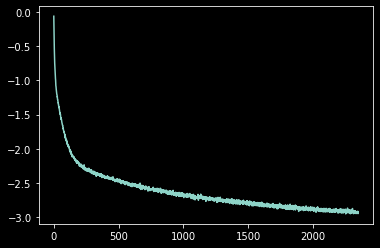

Проецирование скрытого пространства на плоскость..


/Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


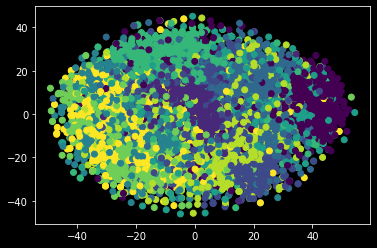

Готово!


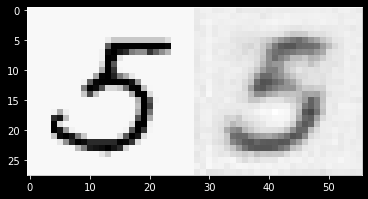

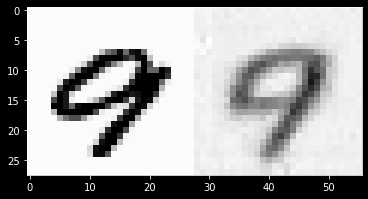

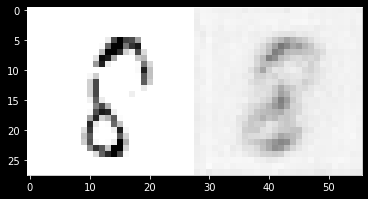

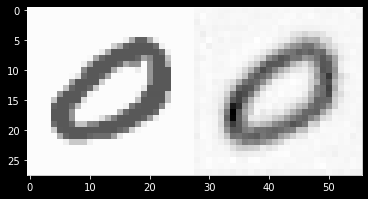

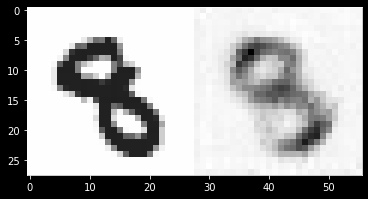

Рассчет анимации..
Готово!


/Users/wibbn/.pyenv/versions/3.9.9/envs/ml/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


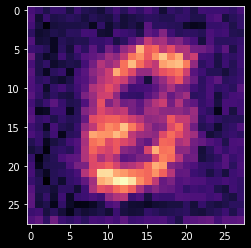

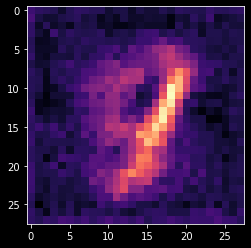

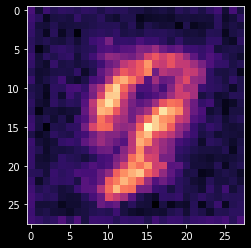

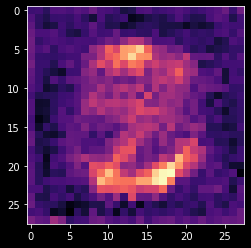

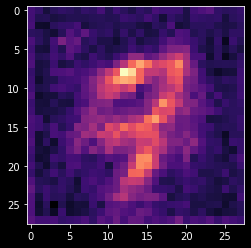

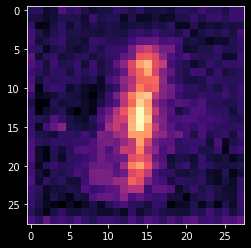

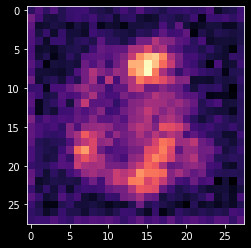

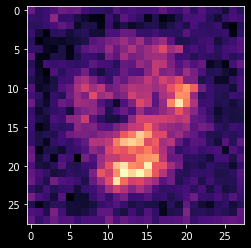

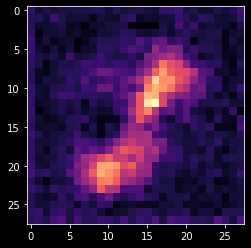

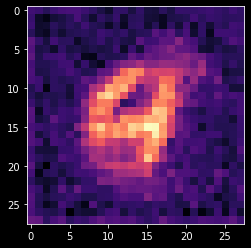

In [3]:
# В этой части лабораторной работы вам предстоит спроектировать, реализовать и обучить вариационный автокодировщик для генерации рукописных цифр.
# Сценарий выполнения кода:
# 1. Обучение автокодировщика.
# 2. Отображение проекции скрытого пространства на плоскость для визуальной оценки распределения данных в скрытом пространстве.
# 3. Интерполяция между несколькими точками в скрытом пространстве, декодирование промежуточных точек в исходное пространство
# и анимация результата.
# 4. Генерация нескольких изображений цифр.
class Encoder(nn.Module):
    # Класс кодировщика, нужно реализовать.

    def __init__(self, latent_size):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(1, 8, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(8, 32, 3, 1, 1),
            nn.ReLU(),
        )
        self.mu = nn.Linear(32*28*28, latent_size)
        self.log_var = nn.Linear(32*28*28, latent_size)
        # ============

        self.latent_size = latent_size

    def forward(self, x):
        mu = None # модельное математическое ожидание z, нужно вычислить.
        log_var = None  # модельный логарифм дисперсии z, нужно вычислить.
        
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        
        mu = self.mu(x) # модельное математическое ожидание z, нужно вычислить.
        log_var = torch.exp(self.log_var(x)) # модельный логарифм дисперсии z, нужно вычислить.

        # ============
        return mu, log_var

    def sample_latent(self, x):
        # Метод для выборки z при помощи кодировщика.
        mu, log_var = self(x)
        return torch.randn_like(mu).to(device) * torch.exp(0.5 * log_var) + mu, mu, log_var


class Decoder(nn.Module):
    # Класс декодировщика, нужно реализовать.

    def __init__(self, latent_size):
        super().__init__()
        self.upconvs = nn.Sequential(
            nn.ConvTranspose2d(32, 8, 3, 1, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 1, 3, 1, 1)
        )
        self.linear = nn.Linear(latent_size, 32*28*28)

        self.relu = nn.ReLU()

        # ============

        self.latent_size = latent_size

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1, 28, 28)
        x = self.upconvs(x)

        # ============
        return x


def KL(mu, log_var):
  return (-0.5 * (1 + log_var - mu**2- torch.exp(log_var)).sum(dim = 1)).mean(dim =0)

def train_ae(data_loader, encoder, decoder, epochs, lr, device):
    # Функция для обучения автокодировщика.
    # Принимает на вход загрузчик тренеровочных данных,
    # кодировщик, декодировщик, количество эпох для обучения, скорость обучения и устройство,
    # на котором находится автокодировщик (cpu или cuda).

    print('Обучение автокодировщика..')

    encoder.train()
    decoder.train()

    alpha = 0.001

    recon_loss_func = nn.MSELoss()  # Функция потерь восстановления, нужно выбрать.
    kl_loss_func = KL # Функция потерь похожести распределения на нормальное.
    optimizer = optim.AdamW(chain(encoder.parameters(), decoder.parameters()), lr=lr)  # Оптимизатор, нужно выбрать и настроить.
    loss_history = list()

    for epoch in range(epochs):
        for i, (batch, _) in enumerate(tqdm(data_loader)):
            # ВАШ КОД ЗДЕСЬ
            optimizer.zero_grad()
            batch = batch.to(device)
            mu, log_var = encoder(batch)
            z = encoder.sample_latent(batch)[0]
            kl_loss = KL(mu, log_var)
            output = decoder(z)
            size = batch.shape[0]
            output = torch.reshape(output, (size, 1, 28, 28))

            recon_loss = recon_loss_func(batch, output)
            loss = recon_loss + kl_loss * alpha

            loss.backward()
            optimizer.step()

            # ============
            if i % 100 == 0:
                print('Потери восстановления:', recon_loss.item())
                print('Потери расхождения распределений:', kl_loss.item())
            loss_history.append(loss.log().item())
        print(f'Эпоха {epoch + 1} / {epochs}. Потери на последнем пакете: {loss.item()}')

    encoder.eval()
    decoder.eval()

    print('Готово!')

    plt.plot(loss_history)
    plt.show()


def lerp(v1, v2, t):
    # Функция для линейной интерполяции между двумя векторами.
    return v1 * (1 - t) + v2 * t


def get_frame(i, data):
    # Функция для анимации
    i = min(i, len(data) - 1)
    ax.clear()
    ax.imshow(data[i])

LATENT_SIZE = 64  # размерность скрытого пространства, можно варьировать.

EPOCHS = 10
LEARNING_RATE = 1e-4
BATCH_SIZE = 256

ANIMATION_IMAGES = 5
ANIMATION_N_FRAMES = (ANIMATION_IMAGES - 1) * 20
ANIMATION_INTERVAL = 50

device = 'cuda' if torch.cuda.is_available() else 'cpu'

encoder = Encoder(LATENT_SIZE).to(device)
decoder = Decoder(LATENT_SIZE).to(device)

summary(encoder, [[1, 28, 28]])
summary(decoder, [[LATENT_SIZE]])

train_data = MNIST('data', train=True, download=True, transform=ToTensor())
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

train_ae(train_data_loader, encoder, decoder, EPOCHS, LEARNING_RATE, device)

test_imgs = list()
for batch, target in train_data_loader:
    test_imgs.extend(zip(batch, target))
    if len(test_imgs) > 5000:
        break
imgs_list, targets = zip(*test_imgs)
imgs = torch.stack(imgs_list).to(device)

print('Проецирование скрытого пространства на плоскость..')
tsne = TSNE()
latent_imgs_emb = [encoder.sample_latent(img.unsqueeze(0))[0].cpu().detach()[0].numpy() for img in imgs]
latent_imgs_emb = tsne.fit_transform(np.array(latent_imgs_emb))
x, y = zip(*latent_imgs_emb)
plt.scatter(x, y, c=targets)
plt.show()
print('Готово!')

latent_imgs = encoder(imgs)[0]
restored_imgs = decoder(latent_imgs)
size = restored_imgs.shape[0]
restored_imgs = torch.reshape(restored_imgs, (size, 1, 28, 28))
for i in range(5):
    orig_restored = torch.hstack((imgs[i][0], restored_imgs[i][0].detach()))
    plt.imshow(orig_restored.cpu().numpy(), cmap='Greys')
    plt.show()

print('Рассчет анимации..')
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
animation_data = list()
for i in range(4 * 20):
    frames_per_conn = ANIMATION_N_FRAMES // (ANIMATION_IMAGES - 1)
    vec_index = i // frames_per_conn
    t = i % frames_per_conn / frames_per_conn
    interp_vec = lerp(latent_imgs[vec_index], latent_imgs[vec_index + 1], t)
    restored_img = decoder(interp_vec.unsqueeze(0)).reshape(-1, 1, 28, 28)
    animation_data.append(restored_img[0][0].detach().cpu().numpy())
print('Готово!')
animation = FuncAnimation(figure, get_frame, frames=ANIMATION_N_FRAMES, interval=ANIMATION_INTERVAL, fargs=(animation_data,))

for _ in range(10):
    gen_latent = torch.randn(1, LATENT_SIZE, device=device)
    gen_digit = decoder(gen_latent).cpu().reshape(-1, 1, 28, 28)
    plt.imshow(gen_digit.detach()[0][0].numpy(), cmap='magma')
    plt.show()